# **CSST106 - Perception and Computer Vision**
##**MACHINE PROBLEM 3**
###**Lesly-Ann B. Victoria from BSCS-4B**

### **PACKAGES**

In [1]:
#Unistall the current Package.
!pip uninstall -y opencv-python opencv-python-headless opencv-contrib-python

Found existing installation: opencv-python 4.10.0.84
Uninstalling opencv-python-4.10.0.84:
  Successfully uninstalled opencv-python-4.10.0.84
Found existing installation: opencv-python-headless 4.10.0.84
Uninstalling opencv-python-headless-4.10.0.84:
  Successfully uninstalled opencv-python-headless-4.10.0.84
Found existing installation: opencv-contrib-python 4.10.0.84
Uninstalling opencv-contrib-python-4.10.0.84:
  Successfully uninstalled opencv-contrib-python-4.10.0.84


In [2]:
#Install necessary development tools and dependencies required to build OpenCV from source.
!apt-get install -y cmake
!apt-get install -y libopencv-dev build-essential cmake git pkg-config libgtk-3-dev \
   libavcodec-dev libavformat-dev libswscale-dev libtbb2 libtbb-dev libjpeg-dev \
   libpng-dev libtiff-dev libdc1394-22-dev libv4l-dev v4l-utils \
   libxvidcore-dev libx264-dev libxine2-dev gstreamer1.0-tools \
   libgstreamer-plugins-base1.0-dev libgstreamer-plugins-good1.0-dev \
   libgtk2.0-dev libtiff5-dev libopenexr-dev libatlas-base-dev \
   python3-dev python3-numpy libtbb-dev libeigen3-dev \
   libfaac-dev libmp3lame-dev libtheora-dev libvorbis-dev \
   libxvidcore-dev libx264-dev yasm libopencore-amrnb-dev \
   libopencore-amrwb-dev libv4l-dev libxine2-dev libtesseract-dev \
   liblapacke-dev libopenblas-dev checkinstall

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
cmake is already the newest version (3.22.1-1ubuntu1.22.04.2).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
E: Unable to locate package libdc1394-22-dev


In [3]:
#Clone the OpenCV repository from GitHub.
!git clone https://github.com/opencv/opencv.git
!git clone https://github.com/opencv/opencv_contrib.git

Cloning into 'opencv'...
remote: Enumerating objects: 336257, done.
remote: Counting objects: 100% (1025/1025), done.
remote: Compressing objects: 100% (823/823), done.
remote: Total 336257 (delta 435), reused 603 (delta 172), pack-reused 335232 (from 1)
Receiving objects: 100% (336257/336257), 527.23 MiB | 24.36 MiB/s, done.
Resolving deltas: 100% (234406/234406), done.
Updating files: 100% (7567/7567), done.
Cloning into 'opencv_contrib'...
remote: Enumerating objects: 41556, done.
remote: Counting objects: 100% (1315/1315), done.
remote: Compressing objects: 100% (947/947), done.
remote: Total 41556 (delta 496), reused 915 (delta 293), pack-reused 40241 (from 1)
Receiving objects: 100% (41556/41556), 149.99 MiB | 21.12 MiB/s, done.
Resolving deltas: 100% (25606/25606), done.
Updating files: 100% (3031/3031), done.


In [4]:
#Change directory to the cloned OpenCV directory.
%cd opencv
#Create a build directory for building the OpenCV source.
!mkdir build
#Move into the newly created build directory.
%cd build

#Run the CMake configuration for building OpenCV with specific options:
!cmake -D CMAKE_BUILD_TYPE=RELEASE \
       -D CMAKE_INSTALL_PREFIX=/usr/local \
       -D OPENCV_ENABLE_NONFREE=ON \
       -D OPENCV_EXTRA_MODULES_PATH=../../opencv_contrib/modules \
       -D BUILD_EXAMPLES=ON ..

#Compile OpenCV using 8 threads (parallel compilation) for faster build times.
!make -j8
#Install the compiled OpenCV library into the system.
!make install

Streaming output truncated to the last 5000 lines.
[  7%] Building CXX object modules/ml/CMakeFiles/opencv_ml.dir/src/boost.cpp.o
[  7%] Building CXX object modules/signal/CMakeFiles/opencv_signal.dir/src/signal_resample.cpp.o
[  7%] Building CXX object apps/version/CMakeFiles/opencv_version.dir/opencv_version.cpp.o
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.cpp.o
[  7%] Linking CXX executable ../../bin/opencv_version
[  7%] Built target opencv_version
[  7%] Linking CXX shared library ../../lib/libopencv_signal.so
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/accum.dispatch.cpp.o
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/approx.cpp.o
[  7%] Built target opencv_signal
[  7%] Building CXX object modules/imgproc/CMakeFiles/opencv_imgproc.dir/src/bilateral_filter.dispatch.cpp.o
[  7%] Linking CXX shared library ../../lib/libopencv_hdf.so
[  7%] Building CXX object modules/imgproc/CMak

### **Step 1: Load Images**

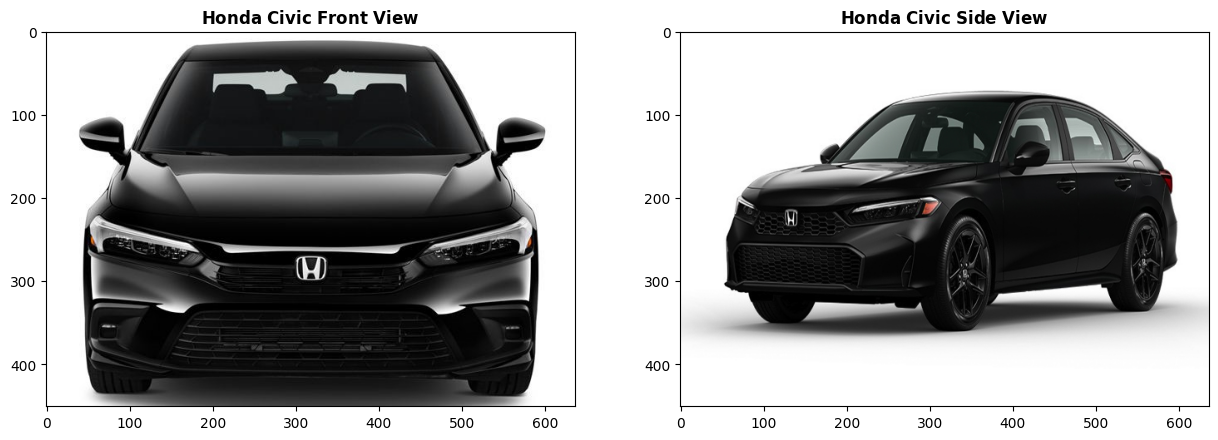

In [30]:
#Import Libraries.
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

#Load the two images.
image1_path = '/content/drive/MyDrive/car_frontview.jpg'
image2_path = '/content/drive/MyDrive/car_sideview.jpg'
image1 = Image.open(image1_path)
image2 = Image.open(image2_path)

#Convert the images to NumPy arrays.
image1_np = np.array(image1)
image2_np = np.array(image2)

#Resize the images to the same size.
height, width = image1_np.shape[:2]
image2_np = cv2.resize(image2_np, (width, height))

#Display the two original color images.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(r'$\bf{Honda\ Civic\ Front\ View}$')
plt.imshow(image1_np)
plt.subplot(1, 2, 2)
plt.title(r'$\bf{Honda\ Civic\ Side\ View}$')
plt.imshow(image2_np)
plt.show()

### **Step 2: Extract Keypoints and Descriptors Using SIFT, SURF, and ORB**

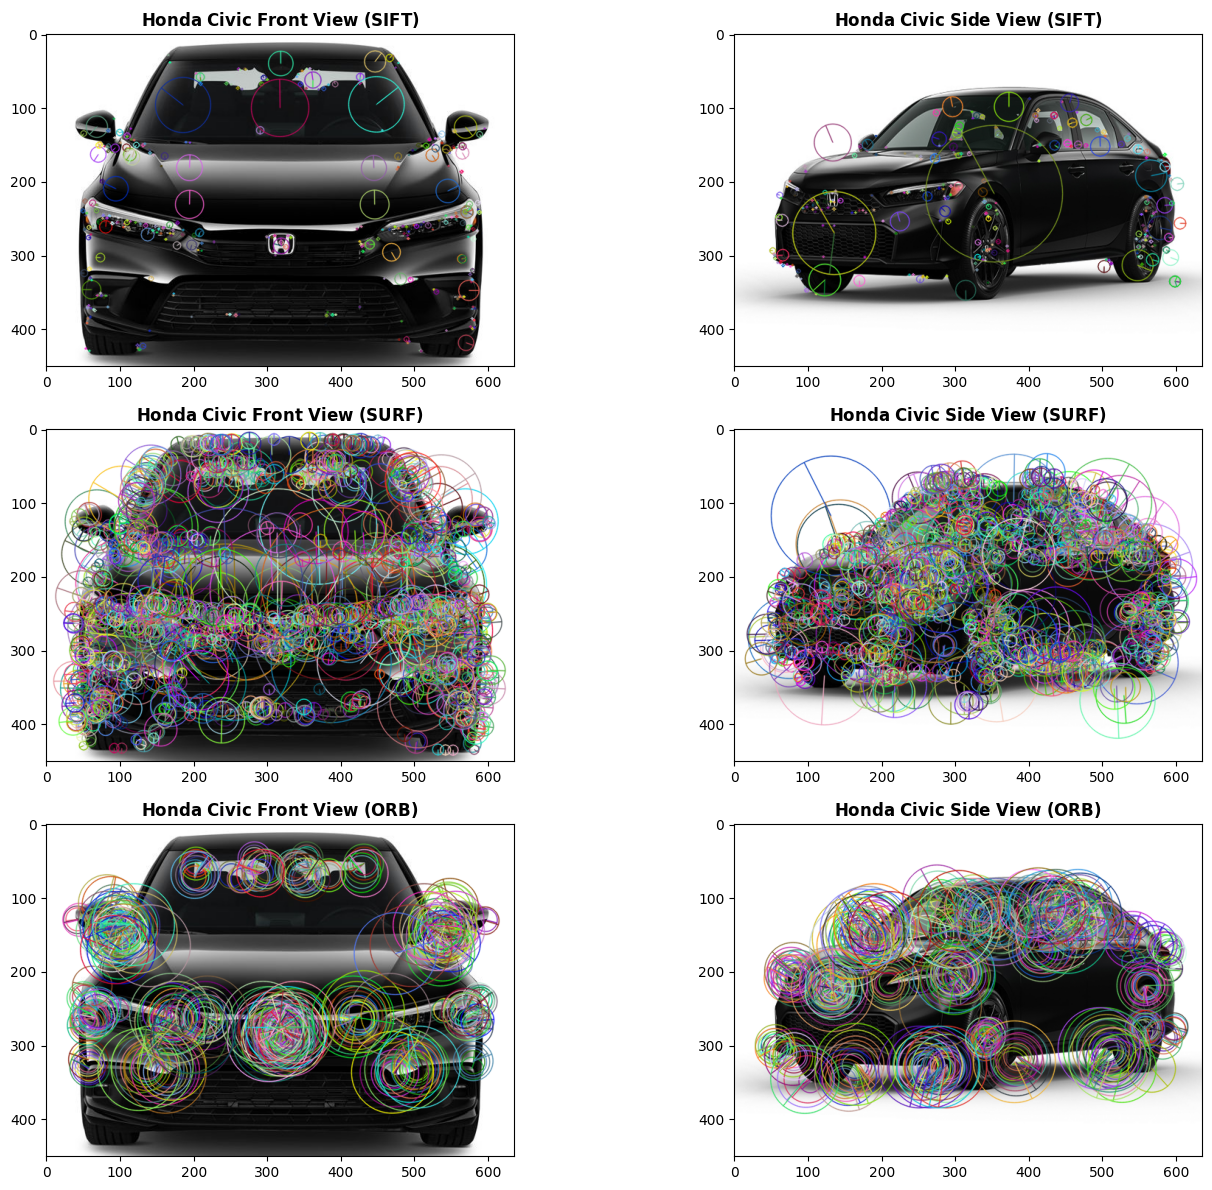

In [34]:
def extract_features(image1, image2):
    #SIFT.
    sift = cv2.SIFT_create()
    kp1_sift, des1_sift = sift.detectAndCompute(image1_np, None)
    kp2_sift, des2_sift = sift.detectAndCompute(image2_np, None)

    #SURF.
    surf = cv2.xfeatures2d.SURF_create()
    kp1_surf, des1_surf = surf.detectAndCompute(image1_np, None)
    kp2_surf, des2_surf = surf.detectAndCompute(image2_np, None)

    #ORB.
    orb = cv2.ORB_create()
    kp1_orb, des1_orb = orb.detectAndCompute(image1_np, None)
    kp2_orb, des2_orb = orb.detectAndCompute(image2_np, None)

    return (kp1_sift, des1_sift, kp2_sift, des2_sift), (kp1_surf, des1_surf, kp2_surf, des2_surf), (kp1_orb, des1_orb, kp2_orb, des2_orb)

#Extract features.
sift_features, surf_features, orb_features = extract_features(image1_np, image2_np)

#Function to draw keypoints.
def draw_keypoints(image, keypoints):
    return cv2.drawKeypoints(image, keypoints, None, flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)

#Draw keypoints for SIFT.
image1_sift_kp = draw_keypoints(image1_np, sift_features[0])
image2_sift_kp = draw_keypoints(image2_np, sift_features[2])

#Draw keypoints for SURF.
image1_surf_kp = draw_keypoints(image1_np, surf_features[0])
image2_surf_kp = draw_keypoints(image2_np, surf_features[2])

#Draw keypoints for ORB.
image1_orb_kp = draw_keypoints(image1_np, orb_features[0])
image2_orb_kp = draw_keypoints(image2_np, orb_features[2])

#Display the keypoints for each method.
plt.figure(figsize=(15, 12))
plt.subplot(3, 2, 1)
plt.title(r'$\bf{Honda\ Civic\ Front\ View\ (SIFT)}$')
plt.imshow(image1_sift_kp)
plt.subplot(3, 2, 2)
plt.title(r'$\bf{Honda\ Civic\ Side\ View\ (SIFT)}$')
plt.imshow(image2_sift_kp)
plt.subplot(3, 2, 3)
plt.title(r'$\bf{Honda\ Civic\ Front\ View\ (SURF)}$')
plt.imshow(image1_surf_kp)
plt.subplot(3, 2, 4)
plt.title(r'$\bf{Honda\ Civic\ Side\ View\ (SURF)}$')
plt.imshow(image2_surf_kp)
plt.subplot(3, 2, 5)
plt.title(r'$\bf{Honda\ Civic\ Front\ View\ (ORB)}$')
plt.imshow(image1_orb_kp)
plt.subplot(3, 2, 6)
plt.title(r'$\bf{Honda\ Civic\ Side\ View\ (ORB)}$')
plt.imshow(image2_orb_kp)
plt.tight_layout()
plt.show()

### **Step 3: Feature Matching with Brute-Force and FLANN**

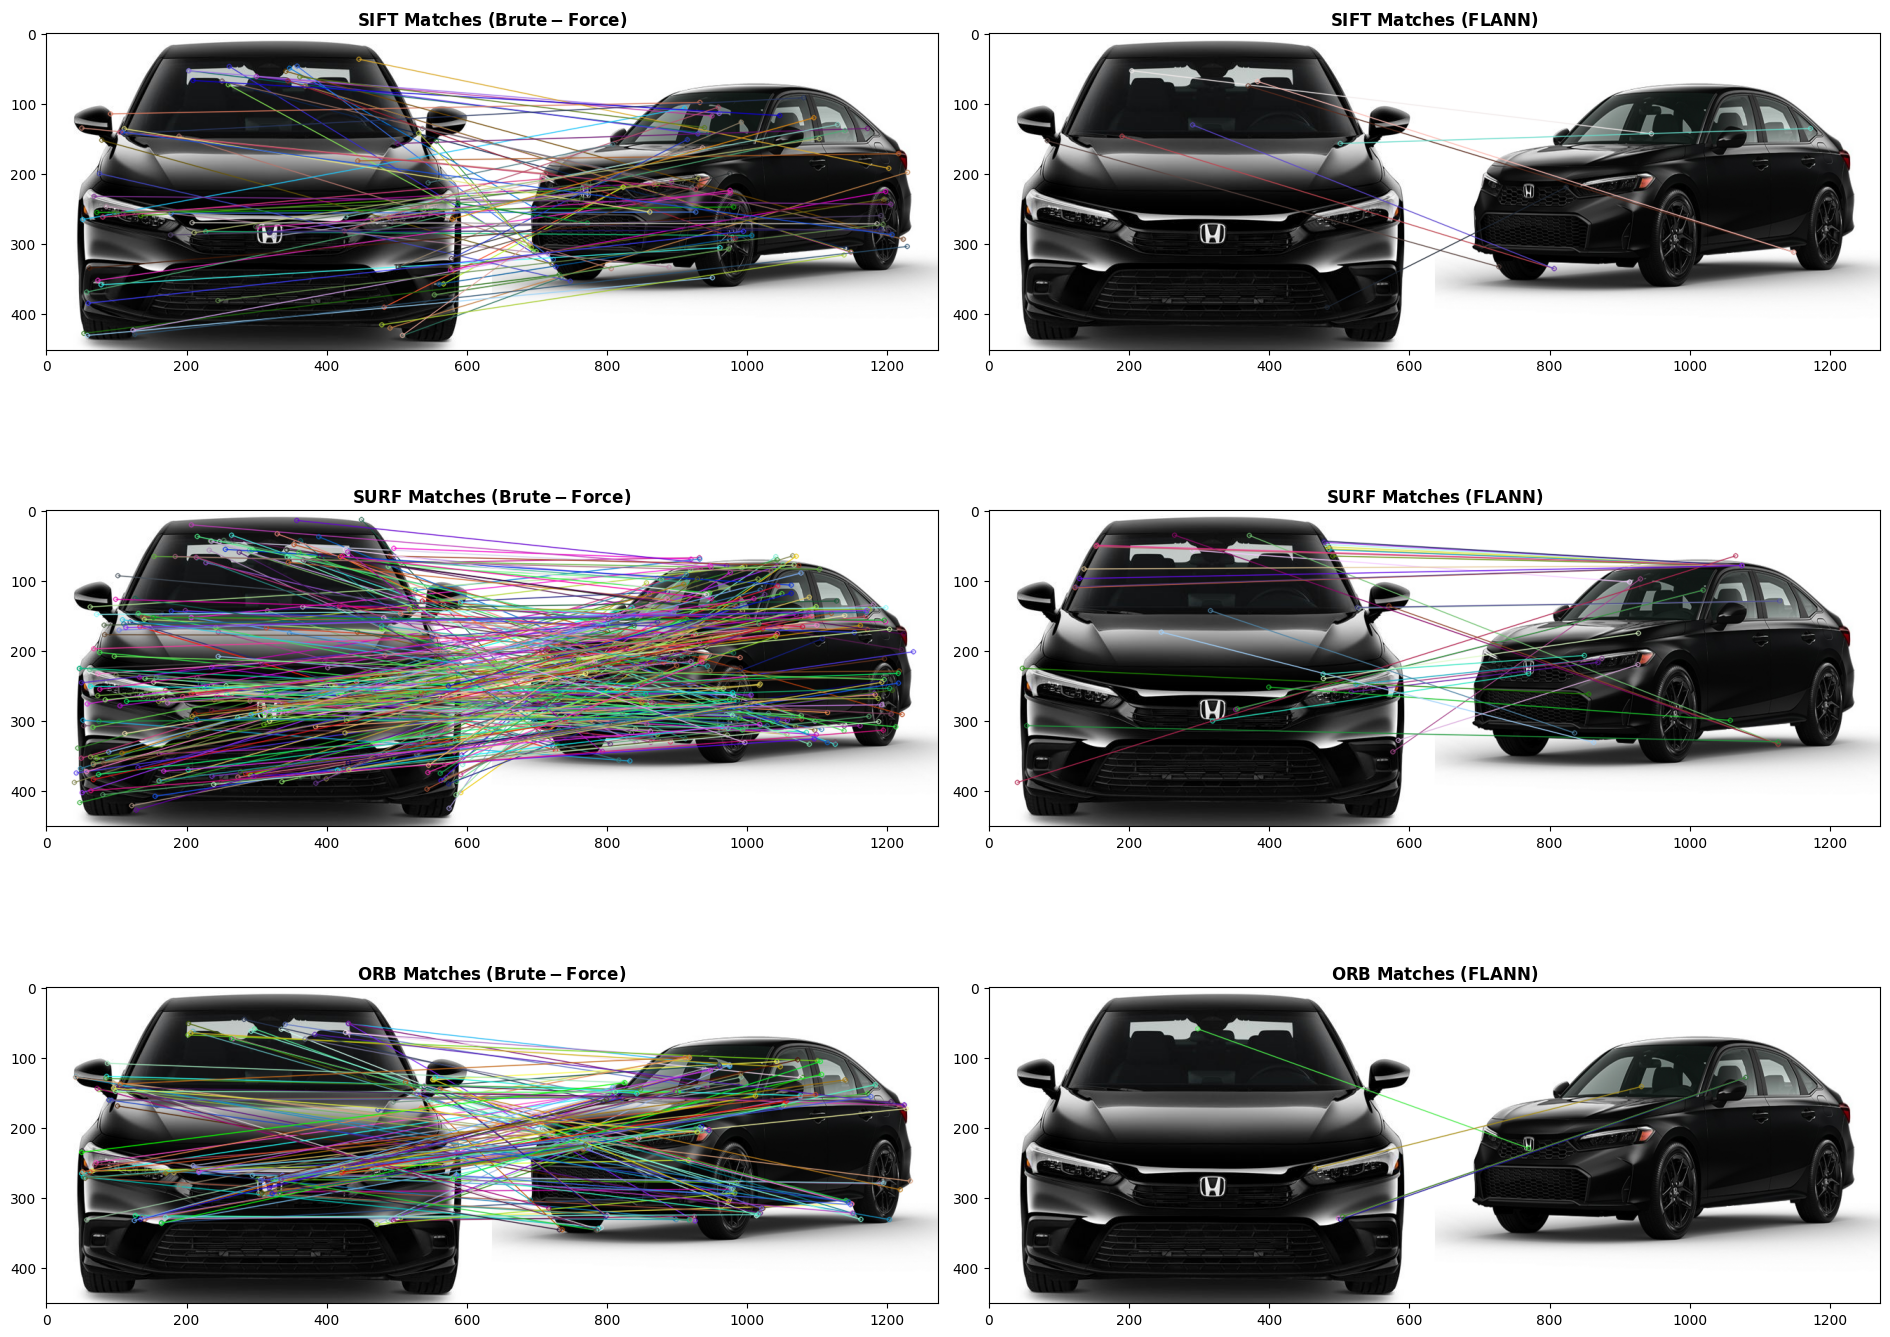

In [38]:
#Function for matching descriptors using Brute-Force Matcher.
def match_descriptors_bf(des1, des2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

#Function for matching descriptors using FLANN Matcher.
def match_descriptors_flann(des1, des2):
    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)
    matches = flann.knnMatch(des1, des2, k=2)

    #Store only the good matches based on the Lowe's ratio test.
    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

#Function to draw matches.
def draw_matches(image1, kp1, image2, kp2, matches):
    matched_image = cv2.drawMatches(image1, kp1, image2, kp2, matches, None,
                                     flags=cv2.DrawMatchesFlags_NOT_DRAW_SINGLE_POINTS)
    return matched_image

#Perform matching for SIFT.
sift_matches_bf = match_descriptors_bf(sift_features[1], sift_features[3])
sift_matches_flann = match_descriptors_flann(sift_features[1], sift_features[3])

#Perform matching for SURF.
surf_matches_bf = match_descriptors_bf(surf_features[1], surf_features[3])
surf_matches_flann = match_descriptors_flann(surf_features[1], surf_features[3])

#Perform matching for ORB.
orb_matches_bf = match_descriptors_bf(orb_features[1], orb_features[3])
orb_matches_flann = match_descriptors_flann(orb_features[1].astype(np.float32), orb_features[3].astype(np.float32))

#Draw matches for each method.
sift_bf_matches_img = draw_matches(image1_np, sift_features[0], image2_np, sift_features[2], sift_matches_bf)
sift_flann_matches_img = draw_matches(image1_np, sift_features[0], image2_np, sift_features[2], sift_matches_flann)

surf_bf_matches_img = draw_matches(image1_np, surf_features[0], image2_np, surf_features[2], surf_matches_bf)
surf_flann_matches_img = draw_matches(image1_np, surf_features[0], image2_np, surf_features[2], surf_matches_flann)

orb_bf_matches_img = draw_matches(image1_np, orb_features[0], image2_np, orb_features[2], orb_matches_bf)
orb_flann_matches_img = draw_matches(image1_np, orb_features[0], image2_np, orb_features[2], orb_matches_flann)

#Display the matching results.
plt.figure(figsize=(19, 15))
#SIFT using Brute-Force Matcher.
plt.subplot(3, 2, 1)
plt.title(r'$\bf{SIFT\ Matches\ (Brute-Force)}$')
plt.imshow(sift_bf_matches_img)
#SIFT using FLANN Matcher.
plt.subplot(3, 2, 2)
plt.title(r'$\bf{SIFT\ Matches\ (FLANN)}$')
plt.imshow(sift_flann_matches_img)
#SURF using Brute-Force Matcher.
plt.subplot(3, 2, 3)
plt.title(r'$\bf{SURF\ Matches\ (Brute-Force)}$')
plt.imshow(surf_bf_matches_img)
#SURF using FLANN Matcher.
plt.subplot(3, 2, 4)
plt.title(r'$\bf{SURF\ Matches\ (FLANN)}$')
plt.imshow(surf_flann_matches_img)
#ORB using Brute-Force Matcher.
plt.subplot(3, 2, 5)
plt.title(r'$\bf{ORB\ Matches\ (Brute-Force)}$')
plt.imshow(orb_bf_matches_img)
#ORB using FLANN Matcher.
plt.subplot(3, 2, 6)
plt.title(r'$\bf{ORB\ Matches\ (FLANN)}$')
plt.imshow(orb_flann_matches_img)
plt.tight_layout()
plt.show()

### **Step 4: Image Alignment Using Homography**

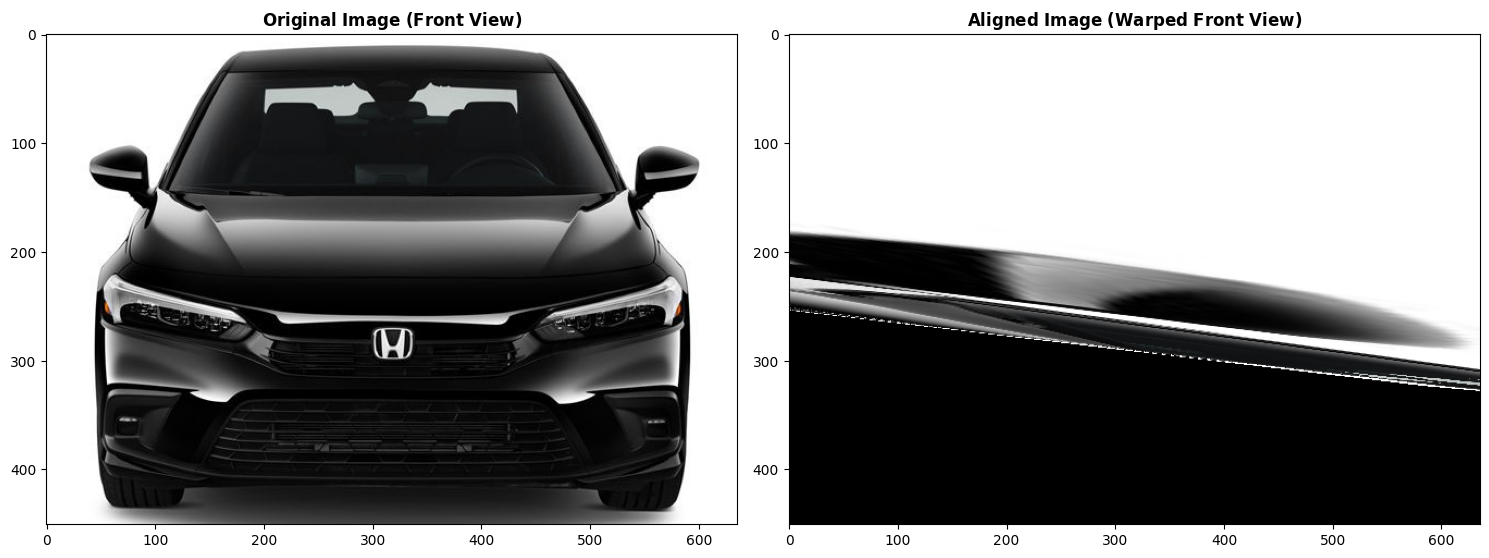

True

In [39]:
#Function to extract keypoints and descriptors using SIFT.
def extract_features(image):
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    sift = cv2.SIFT_create()
    kp, des = sift.detectAndCompute(gray, None)
    return kp, des

#Extract features from both images using SIFT.
kp1, des1 = extract_features(image1_np)
kp2, des2 = extract_features(image2_np)

#Function for matching descriptors using Brute-Force Matcher.
def match_descriptors_bf(des1, des2):
    bf = cv2.BFMatcher(cv2.NORM_L2, crossCheck=True)
    matches = bf.match(des1, des2)
    matches = sorted(matches, key=lambda x: x.distance)
    return matches

#Match descriptors between the two images.
matches = match_descriptors_bf(des1, des2)

#Extract location of good matches.
points1 = np.zeros((len(matches), 2), dtype=np.float32)
points2 = np.zeros((len(matches), 2), dtype=np.float32)

for i, match in enumerate(matches):
    points1[i, :] = kp1[match.queryIdx].pt
    points2[i, :] = kp2[match.trainIdx].pt

#Compute the homography matrix.
H, mask = cv2.findHomography(points1, points2, cv2.RANSAC)

#Warp the first image to align with the second image.
height, width = image2_np.shape[:2]
aligned_image = cv2.warpPerspective(image1_np, H, (width, height))

#Display the original and aligned images.
plt.figure(figsize=(15, 8))
plt.subplot(1, 2, 1)
plt.title(r'$\bf{Original\ Image\ (Front\ View)}$')
plt.imshow(image1_np)
plt.subplot(1, 2, 2)
plt.title(r'$\bf{Aligned\ Image\ (Warped\ Front\ View)}$')
plt.imshow(aligned_image)
plt.tight_layout()
plt.show()

#Save the aligned image.
aligned_image_path = '/content/drive/MyDrive/Aligned_Honda_Civic_Frontview.jpg'
cv2.imwrite(aligned_image_path, aligned_image)

### **Step 5: Performance Analysis**

In [44]:
#Install pandas library.
!pip install pandas

In [47]:
#Import Libraries.
import cv2
import numpy as np
import time
import pandas as pd

#Function to analyze keypoints and descriptors for a given method.
def analyze_feature_extraction(method, image1, image2):
    start_time = time.time()

    if method == 'SIFT':
        sift = cv2.SIFT_create()
        kp1, des1 = sift.detectAndCompute(image1, None)
        kp2, des2 = sift.detectAndCompute(image2, None)

    elif method == 'SURF':
        surf = cv2.xfeatures2d.SURF_create()
        kp1, des1 = surf.detectAndCompute(image1, None)
        kp2, des2 = surf.detectAndCompute(image2, None)

    elif method == 'ORB':
        orb = cv2.ORB_create()
        kp1, des1 = orb.detectAndCompute(image1, None)
        kp2, des2 = orb.detectAndCompute(image2, None)

    end_time = time.time()

    #Calculate the number of keypoints detected and time taken.
    num_keypoints1 = len(kp1)
    num_keypoints2 = len(kp2)
    time_taken = end_time - start_time

    return num_keypoints1, num_keypoints2, time_taken, des1, des2

#Analyze each feature extraction method.
image1_gray = cv2.cvtColor(image1_np, cv2.COLOR_BGR2GRAY)
image2_gray = cv2.cvtColor(image2_np, cv2.COLOR_BGR2GRAY)

methods = ['SIFT', 'SURF', 'ORB']
results = {method: analyze_feature_extraction(method, image1_gray, image2_gray) for method in methods}

#Create a list for feature detection results.
feature_detection_data = []

for method, data in results.items():
    num_kp1, num_kp2, time_taken, _, _ = data
    feature_detection_data.append({
        "Method": method,
        "Keypoints Detected (Image 1)": num_kp1,
        "Keypoints Detected (Image 2)": num_kp2,
        "Time Taken (s)": time_taken
    })

#Create DataFrame for feature detection results.
feature_detection_df = pd.DataFrame(feature_detection_data)

#Display results for feature detection.
print("Feature Detection Performance Analysis:")
print(feature_detection_df.to_string(index=False))

#Function for matching descriptors using FLANN Matcher.
def match_descriptors_flann(des1, des2):
    des1 = des1.astype(np.float32)
    des2 = des2.astype(np.float32)

    index_params = dict(algorithm=1, trees=5)
    search_params = dict(checks=50)
    flann = cv2.FlannBasedMatcher(index_params, search_params)

    matches = flann.knnMatch(des1, des2, k=2)

    good_matches = []
    for m, n in matches:
        if m.distance < 0.7 * n.distance:
            good_matches.append(m)

    return good_matches

#Function to match descriptors and analyze matching performance.
def analyze_matching(des1, des2):
    start_time_bf = time.time()
    matches_bf = match_descriptors_bf(des1, des2)
    end_time_bf = time.time()

    start_time_flann = time.time()
    matches_flann = match_descriptors_flann(des1, des2)
    end_time_flann = time.time()

    bf_time = end_time_bf - start_time_bf
    flann_time = end_time_flann - start_time_flann

    return len(matches_bf), bf_time, len(matches_flann), flann_time

#Analyze matching performance for each method.
matching_results = {}
for method, data in results.items():
    _, _, _, des1, des2 = data
    des1 = des1.astype(np.float32)
    des2 = des2.astype(np.float32)

    matching_results[method] = analyze_matching(des1, des2)

#Create a list for matching performance results.
matching_performance_data = []

for method, data in matching_results.items():
    num_matches_bf, time_bf, num_matches_flann, time_flann = data
    matching_performance_data.append({
        "Method": method,
        "Matches (Brute-Force)": num_matches_bf,
        "Time Taken (BF)": time_bf,
        "Matches (FLANN)": num_matches_flann,
        "Time Taken (FLANN)": time_flann
    })

#Create DataFrame for matching performance results.
matching_performance_df = pd.DataFrame(matching_performance_data)

#Display results for matching performance.
print("\nFeature Matching Performance Analysis:")
print(matching_performance_df.to_string(index=False))

Feature Detection Performance Analysis:
Method  Keypoints Detected (Image 1)  Keypoints Detected (Image 2)  Time Taken (s)
  SIFT                           369                           310        0.175084
  SURF                          1346                          1235        0.905215
   ORB                           500                           500        0.022116

Feature Matching Performance Analysis:
Method  Matches (Brute-Force)  Time Taken (BF)  Matches (FLANN)  Time Taken (FLANN)
  SIFT                     84         0.008679                9            0.013732
  SURF                    281         0.074744               34            0.046170
   ORB                    151         0.010586                5            0.014428
